In [1]:
# Importing packages

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
# Loading cifar10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalizing pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# Compiling the model
model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

# Training the model
model.fit(train_images, train_labels, epochs=10)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

Epoch 1/10
1563/1563 [==============================] - 87s 55ms/step - loss: 1.5529 - accuracy: 0.4333
Epoch 2/10
1563/1563 [==============================] - 84s 53ms/step - loss: 1.1587 - accuracy: 0.5910
Epoch 3/10
1563/1563 [==============================] - 84s 54ms/step - loss: 1.0027 - accuracy: 0.6464
Epoch 4/10
1563/1563 [==============================] - 86s 55ms/step - loss: 0.9136 - accuracy: 0.6777
Epoch 5/10
1563/1563 [==============================] - 85s 54ms/step - loss: 0.8449 - accuracy: 0.7048
Epoch 6/10
1563/1563 [==============================] - 84s 54ms/step - loss: 0.7859 - accuracy: 0.7242
Epoch 7/10
1563/1563 [==============================] - 85s 54ms/step - loss: 0.7429 - accuracy: 0.7401
Epoch 8/10
1563/1563 [==============================] - 88s 57ms/step - loss: 0.7030 - accuracy: 0.7547
Epoch 9/10
1563/1563 [==============================] - 85s 54ms/step - loss: 0.6673 - accuracy: 0.7664
Epoch 10/10
1563/1563 [==============================] - 85s 55m

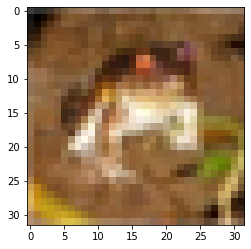

In [6]:
# Plotting the original image

plt.plot()
plt.imshow(train_images[0])
plt.show()

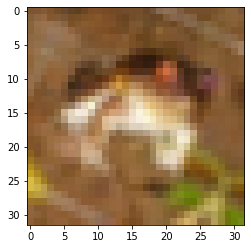

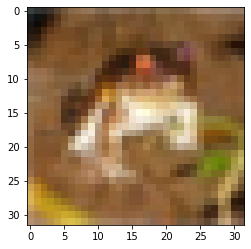

1/1 [==============================] - 0s 110ms/step
Predicted label:  5 True label:  [3]
Predicted label:  8 True label:  [8]
Predicted label:  8 True label:  [8]
Predicted label:  0 True label:  [0]
Predicted label:  6 True label:  [6]
Predicted label:  6 True label:  [6]
Predicted label:  1 True label:  [1]
Predicted label:  2 True label:  [6]
Predicted label:  7 True label:  [3]
Predicted label:  1 True label:  [1]


In [3]:
# Use any two augmentation techniques to improve the test accuracy. Should plot 
# one example of each augmentation technique. 
# 1. Random rotation
# 2. Random zoom

# 1. Random rotation
data_augmentation_rotate = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomRotation(0.2),
])

plt.plot()
plt.imshow(data_augmentation_rotate(train_images)[0])
plt.show()

# 2. Random zoom
data_augmentation_zoom = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.2),
])

plt.plot()
plt.imshow(data_augmentation_zoom(train_images)[0])
plt.show()

# Use the model to predict the label of the first 10 images in the test dataset.
# Print the predicted label and the true label for each image.

# Predict the label of the first 10 images in the test dataset
predictions = model.predict(test_images[:10])

# Print the predicted label and the true label for each image
for i in range(10):
    print("Predicted label: ", predictions[i].argmax(), "True label: ", test_labels[i])

In [4]:
# Expand the training dataset
train_images = np.concatenate((train_images, data_augmentation_rotate(train_images)), axis=0)
train_images = np.concatenate((train_images, data_augmentation_zoom(train_images)), axis=0)
train_labels = np.concatenate((train_labels, train_labels), axis=0)
train_labels = np.concatenate((train_labels, train_labels), axis=0)

# Train the model with the new data concatenated
model.fit(train_images, train_labels, epochs=10)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)


Epoch 1/10
6250/6250 [==============================] - 324s 52ms/step - loss: 1.0161 - accuracy: 0.6469
Epoch 2/10
6250/6250 [==============================] - 335s 54ms/step - loss: 0.9201 - accuracy: 0.6785
Epoch 3/10
6250/6250 [==============================] - 326s 52ms/step - loss: 0.8607 - accuracy: 0.6991
Epoch 4/10
6250/6250 [==============================] - 331s 53ms/step - loss: 0.8139 - accuracy: 0.7155
Epoch 5/10
6250/6250 [==============================] - 327s 52ms/step - loss: 0.7781 - accuracy: 0.7271
Epoch 6/10
6250/6250 [==============================] - 328s 52ms/step - loss: 0.7443 - accuracy: 0.7391
Epoch 7/10
6250/6250 [==============================] - 327s 52ms/step - loss: 0.7193 - accuracy: 0.7477
Epoch 8/10
6250/6250 [==============================] - 334s 53ms/step - loss: 0.6934 - accuracy: 0.7568
Epoch 9/10
6250/6250 [==============================] - 336s 54ms/step - loss: 0.6723 - accuracy: 0.7636
Epoch 10/10
6250/6250 [==============================] 

In [9]:
# Add dropout regularization to the model. Train the model again and evaluate the
# model. Report the test accuracy.

# CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# Compile the model
model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

# Training the model
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

Epoch 1/10
6250/6250 [==============================] - 331s 53ms/step - loss: 1.5106 - accuracy: 0.4548 - val_loss: 1.1107 - val_accuracy: 0.6126
Epoch 2/10
6250/6250 [==============================] - 326s 52ms/step - loss: 1.2435 - accuracy: 0.5580 - val_loss: 1.0301 - val_accuracy: 0.6356
Epoch 3/10
6250/6250 [==============================] - 328s 52ms/step - loss: 1.1499 - accuracy: 0.5935 - val_loss: 0.9484 - val_accuracy: 0.6691
Epoch 4/10
6250/6250 [==============================] - 323s 52ms/step - loss: 1.0955 - accuracy: 0.6131 - val_loss: 0.9414 - val_accuracy: 0.6718
Epoch 5/10
6250/6250 [==============================] - 325s 52ms/step - loss: 1.0531 - accuracy: 0.6284 - val_loss: 0.8788 - val_accuracy: 0.6947
Epoch 6/10
6250/6250 [==============================] - 329s 53ms/step - loss: 1.0233 - accuracy: 0.6392 - val_loss: 0.8419 - val_accuracy: 0.7084
Epoch 7/10
6250/6250 [==============================] - 344s 55ms/step - loss: 1.0001 - accuracy: 0.6480 - val_loss: 0

#### Part B - (3)

The test accuracy increased when adding data augmentation to the model. There can be numerous explanations for this increase. One explanation is that the data augmented data is concatenated to the original model for both random rotation and zoom augmentation. This triples the size of the data set as apparent in the epoch print-outs. By running the chosen data augmentation methods on the dataset, we artificially increase the amount of data present in our model. By randomly rotating and zooming each image, we are training the model harder and as a result, resulting in higher accuracy.

#### Part B - (4)

Using dropout regularization on the dense layers of the model showcased an increase in the validation and test accuracy. However, while training, the training accuracy was much lower compared to when the training was done without the dropout layer in the model. The amount of loss experienced with dropout is also higher when compared to without.
